## 112 DENSITY ALGORITHMS

In [1]:
# for data
import pandas as pd
import numpy as np

# for geospatial
import geopandas as gpd
import geojson

# for viz
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## DEF AND GLOBAL VARIABLES

In [3]:
# GLOBAL variables
MODEL_PATH = '../data/modelbase' # transform this into temp file
FILE_TO_MODEL = 'all_data.geojson'

NAMES_DICT = {
    
    'build_gdf': 'bu_point',
    'arturo_gdf': 'qlity_mdl',
    'madrid_gdf': 'madrid_gdf'
}

MADRID_EPSG = 25830
STATE = 42

 OPENING DATA 


In [4]:
# Opening and naming of ALL DATA
madrid_gdf = gpd.read_file(f"{MODEL_PATH}/{FILE_TO_MODEL}")
madrid_gdf.name = NAMES_DICT['madrid_gdf']
madrid_gdf.set_index('ID', inplace = True)

In [5]:
madrid_gdf.head()

conditionOfConstruction   currentUse  n_BuildingUnits  \
ID                                                                     
0003405VK4700C              functional  residential               22   
0003408VK4700C              functional  residential               14   
0003801VK4700C              functional   industrial                1   
0003804VK4700C              functional   industrial                1   
0003805VK4700C              functional  residential                8   

                n_Dwellings  nFloors_AG  nFloors_BG  area_m2c  area_m2p  \
ID                                                                        
0003405VK4700C           18           6           3      2408       521   
0003408VK4700C           13           4           0      1257       430   
0003801VK4700C            0           1           0       174       174   
0003804VK4700C            0           1           0       174       174   
0003805VK4700C            8           5           0       795       223   

                train  land_use_mix  ...  street_centrality_degree  \
ID                                   ...                             
0003405VK4700C    0.0      0.000278  ...                   0.00007   
0003408VK4700C    1.0      0.000431  ...                   0.00007   
0003801VK4700C    2.0      0.000196  ...                   0.00005   
0003804VK4700C    0.0      0.000309  ...                   0.00007   
0003805VK4700C    0.0      0.000309  ...                   0.00007   

                street_centrality_eigenvector  street_centrality_betweenness  \
ID                                                                             
0003405VK4700C                       0.000091                       0.000092   
0003408VK4700C                       0.000059                       0.000156   
0003801VK4700C                       0.000034                       0.000050   
0003804VK4700C                       0.000107                       0.000078   
0003805VK4700C                       0.000107                       0.000078   

                street_centrality_closeness  street_hierarchy_primary  \
ID                                                                      
0003405VK4700C                     0.015844                       0.0   
0003408VK4700C                     0.016140                       0.0   
0003801VK4700C                     0.015702                       0.0   
0003804VK4700C                     0.015789                       0.0   
0003805VK4700C                     0.015789                       0.0   

                street_hierarchy_secondary  street_hierarchy_tertiary  \
ID                                                                      
0003405VK4700C                         0.0                        1.0   
0003408VK4700C                         0.0                        1.0   
0003801VK4700C                         0.0                        1.0   
0003804VK4700C                         0.0                        1.0   
0003805VK4700C                         0.0                        1.0   

                    value  centuryOfConstr                        geometry  
ID                                                                          
0003405VK4700C  22.249808            20-02  POINT (439952.320 4470136.260)  
0003408VK4700C  18.760974            20-02  POINT (439929.470 4470187.030)  
0003801VK4700C  24.230584            20-02  POINT (439935.790 4470108.490)  
0003804VK4700C  22.108196            20-02  POINT (439965.950 4470112.260)  
0003805VK4700C  22.108196            20-02  POINT (439967.650 4470095.170)  

[5 rows x 64 columns]

In [7]:
madrid_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 121004 entries, 0003405VK4700C to 9997707VK3899F
Data columns (total 64 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   conditionOfConstruction        121004 non-null  object  
 1   currentUse                     121004 non-null  object  
 2   n_BuildingUnits                121004 non-null  int64   
 3   n_Dwellings                    121004 non-null  int64   
 4   nFloors_AG                     121004 non-null  int64   
 5   nFloors_BG                     121004 non-null  int64   
 6   area_m2c                       121004 non-null  int64   
 7   area_m2p                       121004 non-null  int64   
 8   train                          121004 non-null  float64 
 9   land_use_mix                   121004 non-null  float64 
 10  closeness_small_parks          121004 non-null  float64 
 11  residence_ratio                121004 non-null  float6

In [8]:
# columns
# bool_cols = madrid_gdf.columns.tolist()[]
num_cols = madrid_gdf.columns.tolist()[2:62]
geom_col = madrid_gdf.columns.tolist()[63]
cat_cols = ['centuryOfConstr', 'currentUse', 'conditionOfConstruction']


 At this points, there shouldn't be anything else to do to this data

## 1
### PREPROCESSING FOR NUMERIC COLUMNS

In this case, all features are **numeric**, since categorical feature have already been converted to dummies.
Therefore, only standization / normalization is needed

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Standarization --> rescaling to mean == 0 and Std.Dev == 1

# cols to select
num_df = scaler.fit_transform(madrid_gdf.reset_index()[num_cols])

# Getting dummies and dropping cols
cat_df = pd.get_dummies(madrid_gdf[cat_cols])

display(num_df.shape)
display(cat_df.shape)

(121004, 60)

(121004, 19)

In [10]:
# ADD BOOL COLS
madrid_aux = pd.concat([pd.DataFrame(num_df, columns = num_cols), 
                       cat_df.reset_index()], axis = 1)

madrid_scaled = pd.DataFrame(madrid_aux)

madrid_scaled['ID'] = madrid_gdf.reset_index()['ID']
madrid_scaled.set_index('ID', inplace = True)

# madrid_scaled['geometry'] = madrid_gdf['geometry'] 
# add geometry if needed

display(madrid_scaled.head())
display(madrid_scaled.shape)

n_BuildingUnits  n_Dwellings  nFloors_AG  nFloors_BG  \
ID                                                                     
0003405VK4700C         0.087800     0.235904    0.514011    0.679774   
0003408VK4700C        -0.087807     0.028907   -0.215761   -0.710403   
0003801VK4700C        -0.373169    -0.509287   -1.310419   -0.710403   
0003804VK4700C        -0.373169    -0.509287   -1.310419   -0.710403   
0003805VK4700C        -0.219512    -0.178091    0.149125   -0.710403   

                area_m2c  area_m2p     train  land_use_mix  \
ID                                                           
0003405VK4700C  0.039828 -0.052545 -0.618935     -0.102160   
0003408VK4700C -0.138108 -0.065443  1.029568      0.534799   
0003801VK4700C -0.305532 -0.101728  2.678071     -0.443537   
0003804VK4700C -0.305532 -0.101728 -0.618935      0.026897   
0003805VK4700C -0.209530 -0.094783 -0.618935      0.026897   

                closeness_small_parks  residence_ratio  ...  \
ID                                                      ...   
0003405VK4700C               0.020845         0.593430  ...   
0003408VK4700C               0.020845         1.061849  ...   
0003801VK4700C               0.020845         0.224812  ...   
0003804VK4700C              -0.328684         0.916099  ...   
0003805VK4700C              -0.328684         0.916099  ...   

                centuryOfConstr_21-01  currentUse_agriculture  \
ID                                                              
0003405VK4700C                      0                       0   
0003408VK4700C                      0                       0   
0003801VK4700C                      0                       0   
0003804VK4700C                      0                       0   
0003805VK4700C                      0                       0   

                currentUse_industrial  currentUse_office  \
ID                                                         
0003405VK4700C                      0                  0   
0003408VK4700C                      0                  0   
0003801VK4700C                      1                  0   
0003804VK4700C                      1                  0   
0003805VK4700C                      0                  0   

                currentUse_publicServices  currentUse_residential  \
ID                                                                  
0003405VK4700C                          0                       1   
0003408VK4700C                          0                       1   
0003801VK4700C                          0                       0   
0003804VK4700C                          0                       0   
0003805VK4700C                          0                       1   

                currentUse_retail  conditionOfConstruction_declined  \
ID                                                                    
0003405VK4700C                  0                                 0   
0003408VK4700C                  0                                 0   
0003801VK4700C                  0                                 0   
0003804VK4700C                  0                                 0   
0003805VK4700C                  0                                 0   

                conditionOfConstruction_functional  \
ID                                                   
0003405VK4700C                                   1   
0003408VK4700C                                   1   
0003801VK4700C                                   1   
0003804VK4700C                                   1   
0003805VK4700C                                   1   

                conditionOfConstruction_ruin  
ID                                            
0003405VK4700C                             0  
0003408VK4700C                             0  
0003801VK4700C                             0  
0003804VK4700C                             0  
0003805VK4700C                             0  

[5 rows x 79 columns]

(121004, 79)

## 2
### PCA - DIMENSION REDUCTION

One problem of this dataset is the high number of features (80columns) because:
>- Makes the training very slow
>- Makes it difficult to find a good solution

This is known as the curse of dimensionality and the Dimensionality Reduction is the process of reducing the number of features to the most relevant ones in simple terms.

Reducing dimensionality does lose some information, however as most compressing processes it comes with some drawbacks, even though we get the training faster, we make the system perform slighly worse, but this is ok, because it can filter some of the noise and unnecesary details present in the dataset.

There are two main approaches to dimension reduction:
>- **PROJECTION**: PCA
>- **MANIFOLD LEARNING**: Relies on the hypothesis which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold.

#### 2.1 Lets use PCA (Principal Component Analysis) to analyze the most sitable dimension for geodata features

This technique works by identifying the hyperplane which lies closest to the data and then projects the data on that hyperplane while retaining most of the variation in the dataset.

Drawbacks: 
>- It is highly influenced by outliers present in the data
>- It is a linear projection, which means it can't capture non-linear dependencies.

In [11]:
from sklearn.decomposition import PCA

geodata_pca = PCA().fit(madrid_scaled)

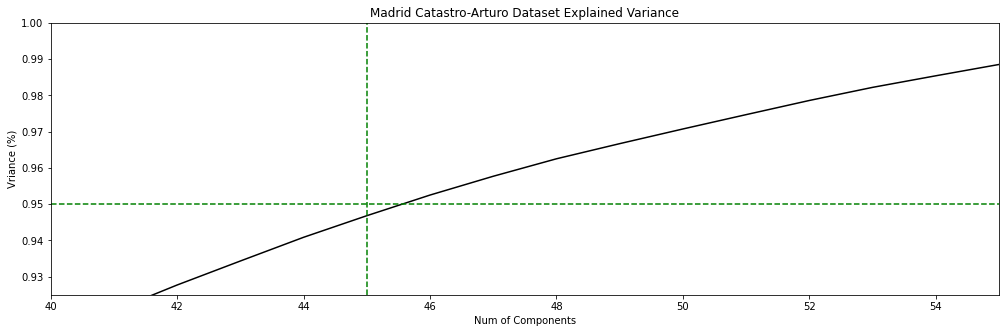

In [12]:
plt.figure(figsize=(17,5))
plt.plot(np.cumsum(geodata_pca.explained_variance_ratio_), c = 'k')
plt.axhline(0.95, ls = '--', c = 'g')
plt.axvline(45, ls = '--', c = 'g')

plt.xlabel('Num of Components')
plt.ylabel('Vriance (%)')
plt.title('Madrid Catastro-Arturo Dataset Explained Variance')

plt.ylim([0.925 ,1])
plt.xlim([40,55])
plt.show()

   The plot shows that selecting 9 components, I can preserve around 98-99% of the total variance of the data. It makes sence not to usse the 100% of our variance, because it denotes all components and we want only the principal ones.

In [13]:
# Optimum analysis
geodata_pca = PCA(n_components = 45)
madrid_pca_gdf = geodata_pca.fit_transform(madrid_scaled)

In [14]:
madrid_pca = pd.DataFrame(madrid_pca_gdf)

madrid_pca['ID'] = madrid_gdf.reset_index()['ID']
madrid_pca.set_index('ID', inplace = True)

madrid_pca

0         1         2         3         4         5   \
ID                                                                           
0003405VK4700C -3.033361  0.849688  0.933931  3.445757  2.499876  4.644486   
0003408VK4700C -2.474611 -0.201429  0.353306  3.419921  3.811556  3.984688   
0003801VK4700C -3.183985  0.277012 -0.439895  3.323010  2.678470  6.137879   
0003804VK4700C -3.146431 -0.262956 -0.298498  3.275574  3.167229  4.661653   
0003805VK4700C -2.881728  0.117084  0.345312  3.260934  3.012648  4.634529   
...                  ...       ...       ...       ...       ...       ...   
9991101VK4799B -2.584983  3.330984 -1.531824 -0.424926  0.006815  1.577749   
9997504VK3899H -4.471866  9.031602 -9.931970  6.960273  9.015018  3.691994   
9997505VK3899H -4.471641  9.033435 -9.930738  6.962013  9.014658  3.691517   
9997706VK3899F -4.342846  6.460574 -7.051944  4.530012  6.355139  2.838216   
9997707VK3899F -4.399379  6.386504 -7.149881  4.537837  6.380489  2.836869   

                      6         7         8         9   ...        35  \
ID                                                      ...             
0003405VK4700C  0.631947 -4.452320  1.984093  1.320484  ...  0.852386   
0003408VK4700C  0.668923 -4.164933  2.201832  1.362487  ... -0.181232   
0003801VK4700C  0.090814 -3.785170  2.052946  0.957503  ... -1.392131   
0003804VK4700C  0.546960 -4.255306  2.162905  1.112127  ... -0.075665   
0003805VK4700C  0.677256 -4.354905  2.296272  0.917275  ... -0.101817   
...                  ...       ...       ...       ...  ...       ...   
9991101VK4799B  1.019008  1.739410  0.945729  3.735688  ...  0.200248   
9997504VK3899H  4.703328  3.066035  0.771413 -9.403497  ...  2.328492   
9997505VK3899H  4.705135  3.068154  0.770926 -9.401645  ...  2.328530   
9997706VK3899F  2.550360  2.639743  0.158750 -6.220324  ...  1.771664   
9997707VK3899F  2.540247  2.661948  0.156300 -6.176820  ...  1.787561   

                      36        37        38        39        40        41  \
ID                                                                           
0003405VK4700C  0.719380  0.120897 -0.241806 -0.759948  1.355124 -0.206955   
0003408VK4700C  0.758178  0.262799 -0.799389 -1.125104  1.000060 -0.137791   
0003801VK4700C -0.146710  0.182809 -0.987448  0.088758  1.818056  0.591261   
0003804VK4700C  0.240699  0.134460 -0.783199 -0.317839  1.877186  0.484082   
0003805VK4700C  0.325433  0.616209 -0.497752 -0.760494  1.378286  0.184604   
...                  ...       ...       ...       ...       ...       ...   
9991101VK4799B -1.058512 -0.426015  0.394079 -0.604483  0.067542  0.405595   
9997504VK3899H -6.056964 -5.944259  1.682982  1.035741 -1.856911  1.636930   
9997505VK3899H -6.057319 -5.944097  1.682638  1.035005 -1.857107  1.636532   
9997706VK3899F -3.223601 -3.039534  0.928982  1.082586 -1.368479  0.880348   
9997707VK3899F -3.240602 -3.162580  0.858504  1.199873 -1.253381  0.953916   

                      42        43        44  
ID                                            
0003405VK4700C -0.151639  0.448760 -0.552050  
0003408VK4700C -0.315025  0.910660 -0.315613  
0003801VK4700C -0.323193  0.561077 -0.285117  
0003804VK4700C -0.440448  0.173059 -0.005676  
0003805VK4700C  0.236267  0.220020 -0.160088  
...                  ...       ...       ...  
9991101VK4799B -0.682583 -0.239215  0.363571  
9997504VK3899H  0.878470  1.547774 -0.031430  
9997505VK3899H  0.878155  1.547208 -0.031644  
9997706VK3899F  0.587312  0.994966 -0.219234  
9997707VK3899F  0.429565  0.992387 -0.185030  

[121004 rows x 45 columns]

#### 2.2 Lets use UMAP (Uniform Manifold Approximation and Projection)

Is a general-purpose manifold learning and dimension reduction algorithm created in 2018 by Leland McInnes, John Healy, James Melville. It is a nonlinear dimensionality reduction method and is very effective for visualizing clusters or groups of data points and their relative proximities.

It doesn't require PCA as a prior pre-processing step in the case of sparse matrices, like in the case of t-SNE, which is another -very similar- dim.red. method.

HYPERPARAMETERS that have an impact on the resulting embeddings:
>- **n_neighbors**: how balanced local vs. global structure in the data.
    * Low values: forces UMAP to focus on very local structures
    * High values: forces UMAP to focus on the larger neighbourhoods.

>- **min_dist**: controls how tightly UMAP is allowed to pack points together.
    * Low values: points will be clustered closely
    * High values: points will be clustered sparingly
    
>- **n_components**: determine the dimensionality of the reduced dimension space
>- **metric**: how distance is computed in the ambient space of the input data.

[link doc](https://umap-learn.readthedocs.io/en/latest/parameters.html?highlight=metric#metric)

In [45]:
import umap

reducer_geodata = umap.UMAP(random_state = STATE,
                            verbose = True,
                            learning_rate = 0.9, # tune
                            metric = 'correlation', # default euclidean
                            n_neighbors = 25,  # default 15
                            n_components = 10, # since from PCA 9 componentes losses around 0.01% of info and normal gdf w elbow is 24
                            repulsion_strength = 1.15,
                            local_connectivity = 1.25, #local connectivity constraint ensures that we focus on the difference in distances among nearest neighbors rather than the absolute distance
                            min_dist = 0.001 # default 0.1 lower val for clustering
                            )

reducer_geodata.fit(madrid_scaled)
madrid_umap = reducer_geodata.transform(madrid_scaled)

# NOTES _________________
# Params with the most influence on this dataset:
# n_neighbors, n_components -> rely a lot on knowledge of the dataset
# min_dist -> makes the clustering 2D representation far more clearer
# metric -> cosine and euclidean give an error


UMAP(angular_rp_forest=True, learning_rate=0.9, local_connectivity=1.25,
     metric='correlation', min_dist=0.001, n_components=10, n_neighbors=25,
     random_state=42, repulsion_strength=1.15, verbose=True)
Construct fuzzy simplicial set
Thu Oct 22 21:06:31 2020 Finding Nearest Neighbors
Thu Oct 22 21:06:31 2020 Building RP forest with 22 trees
Thu Oct 22 21:06:33 2020 NN descent for 17 iterations
	 0  /  17
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
Thu Oct 22 21:06:58 2020 Finished Nearest Neighbor Search
Thu Oct 22 21:07:00 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Oct 22 21:08:35 2020 Finished embedding


Text(0.5, 1.0, 'Geodata Embedding projection')

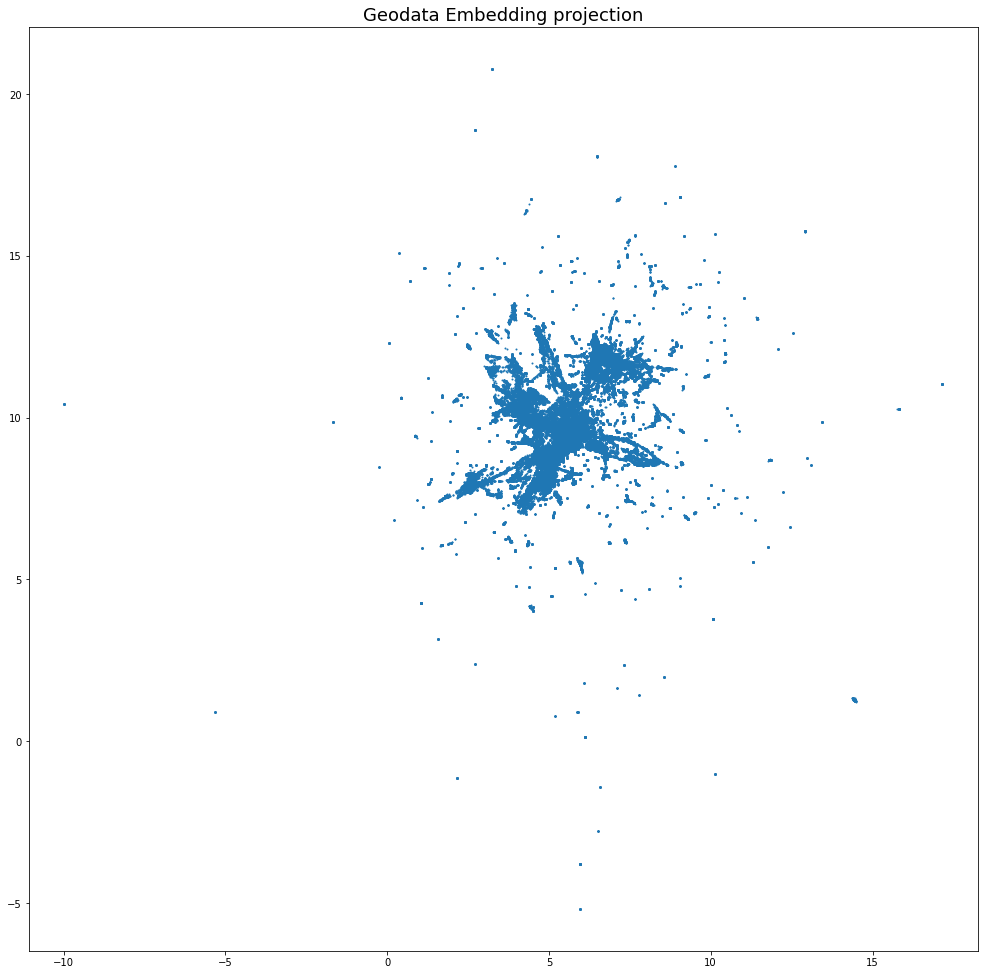

In [46]:
plt.figure(figsize = (17,17))
plt.scatter(x = madrid_umap[:, 0], 
            y = madrid_umap[:, 1], 
            s =1)

plt.gca().set_aspect('equal', 'datalim')
plt.title('Geodata Embedding projection', fontsize=18)

## 4
#### DENSITY BASED CLUSTERING: DBSCAN

Works by grouping regions of high density and separating them from regions of low density. 
Most famous algorith is DBSCAN. Density is calculated as follows:
>- EPS: defines the neighborhood around the data point:
     If the dist between 2Pts is <= EPS --> they are neighbors
 >- MinPTs: minimum number of data Pts that form a neighborhood. Size of DF and value of MinPts are directly proportional.
 
 Mostly used for clustering planar space.
 Good result can be achieved if it is used for mapping: natural disasters, weather stations in a city.
 DBSCAN can be seen also as a special and efficient variant of spectral clustering, being a non-matrix based implementation that only needs o(n) memory

**WITH UMAP** 
(clusters with low variance)
WORKS WITH UMAP not with PCA

In [50]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps = 0.6,
                      min_samples = 120,
                      n_jobs = 10).fit(madrid_umap)

# EPS 1.25 + MIN_SAMPLES 65

In [51]:
np.array(dbscan_model.labels_).max() # how many labels are there?

77

In [42]:
dbscan_model.labels_

array([ 0,  0,  0, ..., -1, -1, -1])

In [52]:
from sklearn import metrics

### Metrics
dbscan_model_var = metrics.calinski_harabasz_score(madrid_umap, 
                                               dbscan_model.labels_)
display(dbscan_model_var)

dbscan_model_db = metrics.davies_bouldin_score(madrid_umap, 
                                           dbscan_model.labels_)
display(dbscan_model_db)

1996.2132038989707

1.416830367786737

In [44]:
## SILHOUETTE METRIC at last
## Separated because of computing time
dbscan_model_silh = metrics.silhouette_score(madrid_umap, 
                                         dbscan_model.labels_)
display(dbscan_model_silh)

/home/lucia/miniconda3/envs/geoesp_env/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:320: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/home/lucia/miniconda3/envs/geoesp_env/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:320: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


KeyboardInterrupt: 

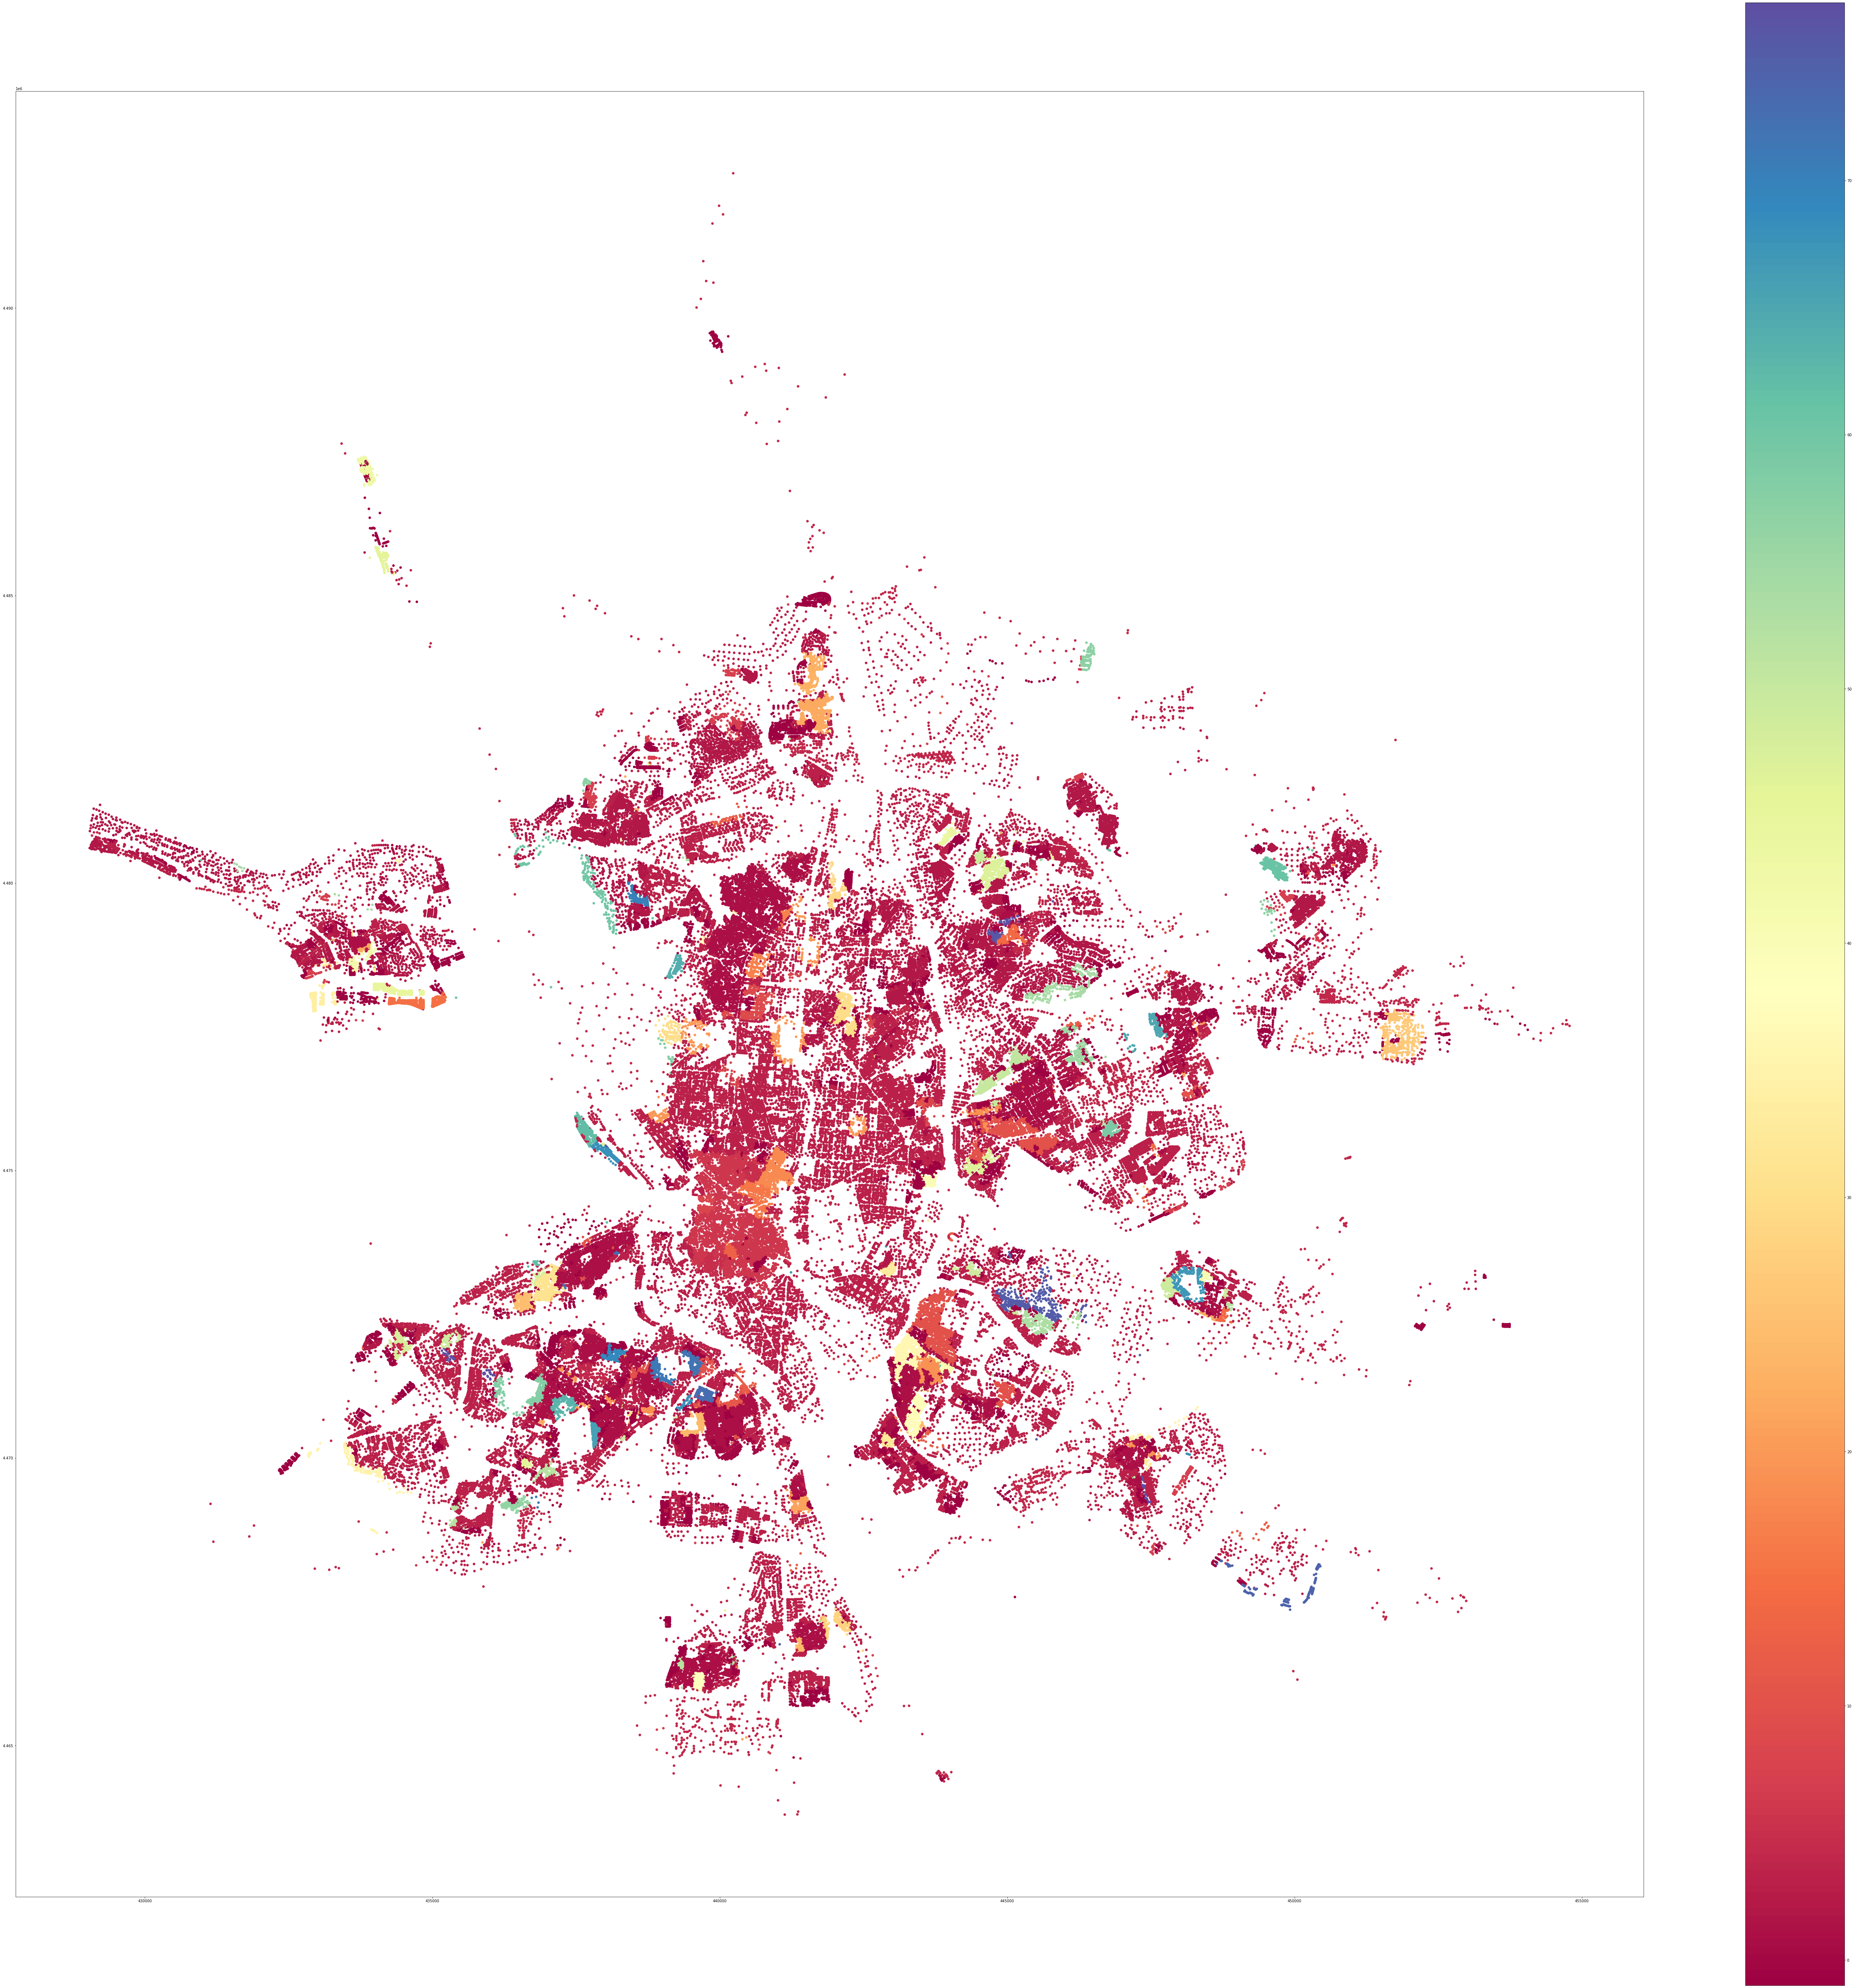

In [53]:
madrid_gdf['dbscan_labels']= dbscan_model.labels_.tolist()

col_to_draw = 'dbscan_labels' # col value corresponds grossfloorarea
madrid_gdf[['geometry', col_to_draw]].plot(figsize = (100,100), 
                                           column = col_to_draw, 
                                           legend = True,
                                           cmap = 'Spectral')
plt.show()

**Conclusions** 
Clearly DBSCAN Its affected by dimensionality.
Clustering if drastically different results from KMeans, not being as clearly realted as KMeans with morphology.

### ANALYSIS OF RESULTS

Lets see how both algorithms have behaved

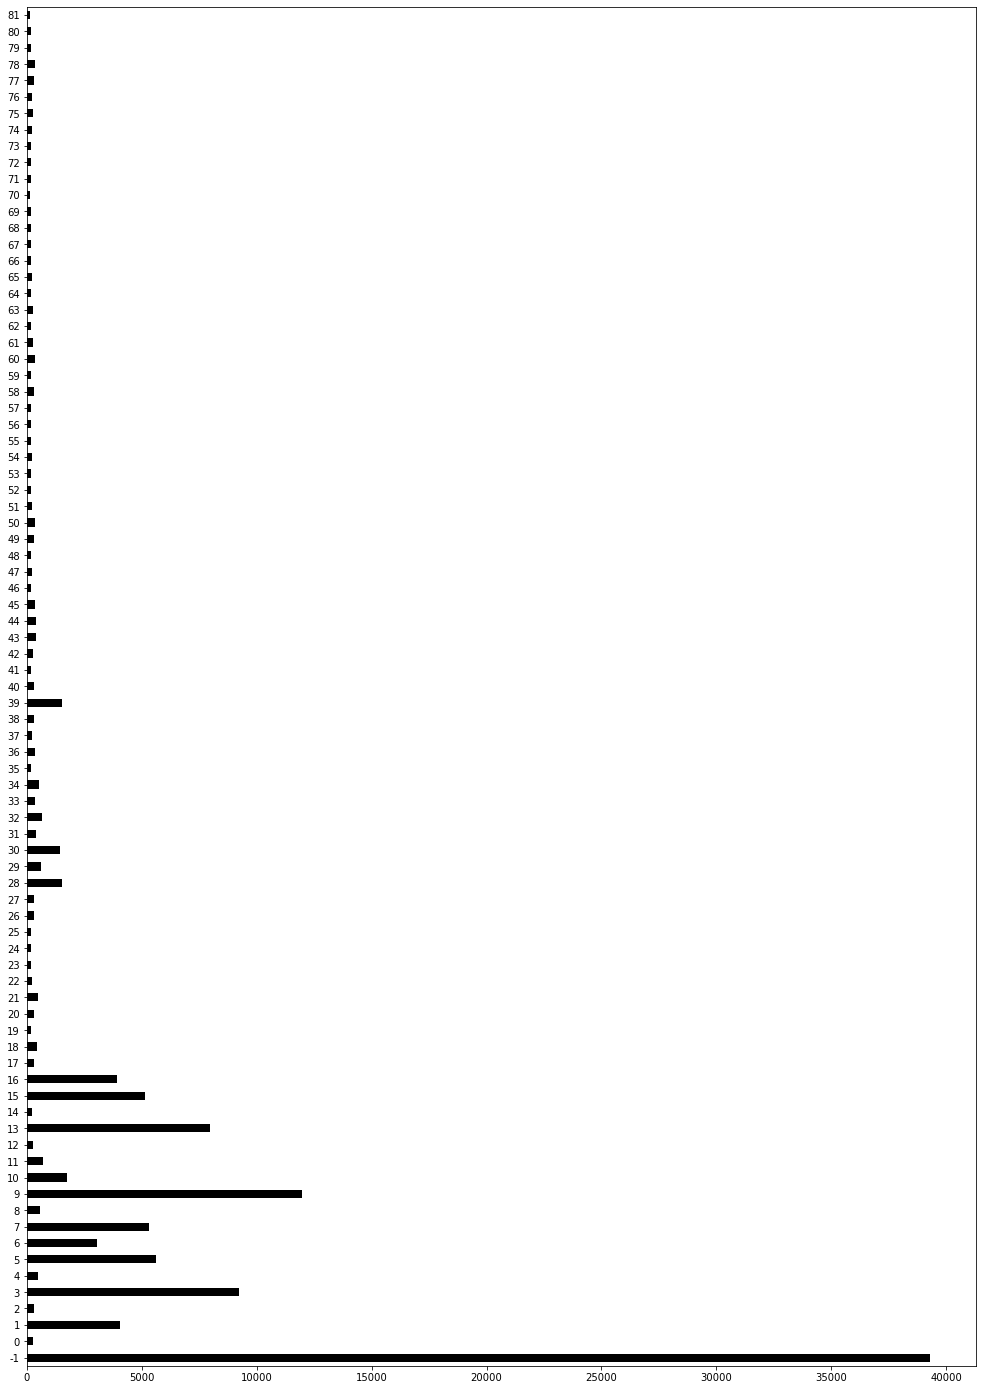

In [112]:
madrid_gdf['dbscan_labels'].value_counts().sort_index().plot.barh(figsize = (17,25),
                                                                  color = 'k')
plt.show()

In [46]:
## Let's do another dataframe with scaled data in order to viz relevance of cols

madrid_lbl = pd.concat([madrid_scaled, madrid_gdf['dbscan_labels']],axis = 1)
display(madrid_lbl.head())
display(madrid_lbl.shape)

n_BuildingUnits  n_Dwellings  nFloors_AG  nFloors_BG  \
ID                                                                     
0002601VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002602VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002603VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002604VK4700A        -0.045885      0.16012    1.944412    -0.69189   
0002605VK4700A        -0.045885      0.16012    1.944412    -0.69189   

                 ID_part  area_m2c  area_m2p     train  land_use_mix  \
ID                                                                     
0002601VK4700A -0.200645  -0.03341 -0.139837 -0.455303     -0.490179   
0002602VK4700A -0.200645  -0.03341 -0.139837 -0.637199     -0.491000   
0002603VK4700A -0.200645  -0.03341 -0.139837 -0.488712     -0.525614   
0002604VK4700A -0.200645  -0.03341 -0.139837 -1.156903     -0.705578   
0002605VK4700A -0.200645  -0.03341 -0.139837 -1.156903     -0.878403   

                closeness_small_parks  ...  currentUse_agriculture  \
ID                                     ...                           
0002601VK4700A              -0.047585  ...                       0   
0002602VK4700A              -0.060825  ...                       0   
0002603VK4700A              -0.041911  ...                       0   
0002604VK4700A              -0.027726  ...                       0   
0002605VK4700A               0.071572  ...                       0   

                currentUse_industrial  currentUse_office  \
ID                                                         
0002601VK4700A                      0                  0   
0002602VK4700A                      0                  0   
0002603VK4700A                      0                  0   
0002604VK4700A                      0                  0   
0002605VK4700A                      0                  0   

                currentUse_publicServices  currentUse_residential  \
ID                                                                  
0002601VK4700A                          0                       1   
0002602VK4700A                          0                       1   
0002603VK4700A                          0                       1   
0002604VK4700A                          0                       1   
0002605VK4700A                          0                       1   

                currentUse_retail  conditionOfConstruction_declined  \
ID                                                                    
0002601VK4700A                  0                                 0   
0002602VK4700A                  0                                 0   
0002603VK4700A                  0                                 0   
0002604VK4700A                  0                                 0   
0002605VK4700A                  0                                 0   

                conditionOfConstruction_functional  \
ID                                                   
0002601VK4700A                                   1   
0002602VK4700A                                   1   
0002603VK4700A                                   1   
0002604VK4700A                                   1   
0002605VK4700A                                   1   

                conditionOfConstruction_ruin  dbscan_labels  
ID                                                           
0002601VK4700A                             0              0  
0002602VK4700A                             0              0  
0002603VK4700A                             0              0  
0002604VK4700A                             0              0  
0002605VK4700A                             0              0  

[5 rows x 81 columns]

(92522, 81)

In [51]:
more_important_cols = ['value', 'street_centrality_degree', 'residence_ratio', 'closeness_large_parks', 
                       'closeness_primary_roads', 'street_hierarchy_secondary', 'n_BuildingUnits', 
                       'nFloors_AG', 'centuryOfConstr_19-02', 'train', 'commerce_surface',                     
                       'age_deviation_diversity', 'leisure_density', 'housing_surface', 
                      'tertiary_roads_length',  'closeness_secondary_roads', 'average_quality', 
                       'average_age', 'centuryOfConstr_20-02', 'centuryOfConstr_21-01', 'anisotropicity', 
                       'street_hierarchy_primary', 'currentUse_residential', 
                      'conditionOfConstruction_functional', 'conditionOfConstruction_declined']


table_km_model = pd.pivot_table(madrid_lbl,
                                values = more_important_cols,
                                index = 'dbscan_labels',
                                aggfunc = np.mean)

table_km_model

age_deviation_diversity  anisotropicity  average_age  \
dbscan_labels                                                         
-1                           -0.474063        0.016908     0.256473   
 0                           -0.697021        0.146233     0.567419   
 1                           -0.341166        1.058130     0.132595   
 2                           -0.499507       -0.507008     0.518393   
 3                           -0.034688       -0.560856     0.284781   
...                                ...             ...          ...   
 232                          1.701450        0.173880    -1.163656   
 233                          1.362919       -0.086884    -0.646907   
 234                         -1.380445        0.183839     0.706085   
 235                         -0.698505       -0.291574     0.674535   
 236                          1.613769        0.213278    -1.601328   

               average_quality  centuryOfConstr_19-02  centuryOfConstr_20-02  \
dbscan_labels                                                                  
-1                    0.079045               0.012351               0.774044   
 0                    0.702094               0.000000               0.939502   
 1                   -0.436325               0.006188               0.744711   
 2                    0.865536               0.000000               0.671583   
 3                    0.789853               0.000000               0.643836   
...                        ...                    ...                    ...   
 232                 -1.671718               0.080000               0.340000   
 233                 -1.386627               0.000000               0.271429   
 234                  1.187947               0.000000               0.247619   
 235                 -0.349373               0.000000               0.533808   
 236                 -2.502226               0.500000               0.131579   

               centuryOfConstr_21-01  closeness_large_parks  \
dbscan_labels                                                 
-1                          0.091272              -0.239154   
 0                          0.032028              -1.358469   
 1                          0.120758              -0.044608   
 2                          0.049915              -0.159481   
 3                          0.068493               0.368663   
...                              ...                    ...   
 232                        0.010000               0.368663   
 233                        0.014286               0.368663   
 234                        0.038095               0.343036   
 235                        0.227758              -0.039436   
 236                        0.013158               0.269010   

               closeness_primary_roads  closeness_secondary_roads  ...  \
dbscan_labels                                                      ...   
-1                           -0.114221                  -0.045572  ...   
 0                            0.252595                   0.002094  ...   
 1                           -0.555250                  -0.714165  ...   
 2                            0.215188                   0.576686  ...   
 3                            0.252595                   0.666029  ...   
...                                ...                        ...  ...   
 232                          0.252595                  -1.715106  ...   
 233                          0.252595                   0.494808  ...   
 234                          0.252595                   0.626221  ...   
 235                          0.252595                   0.232120  ...   
 236                          0.252595                   0.552071  ...   

               leisure_density  nFloors_AG  n_BuildingUnits  residence_ratio  \
dbscan_labels                                                                  
-1                   -0.556384   -0.393066        -0.228758        -0.106677   
 0                   -0.327

In [56]:
table_km_model.sort_values(by = 'value', inplace = True)

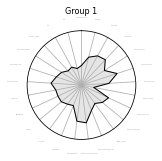

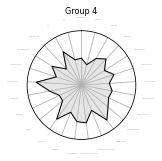

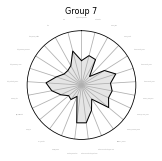

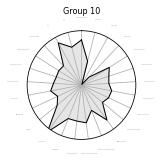

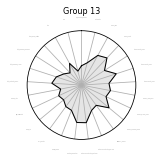

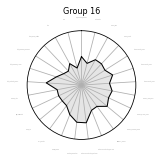

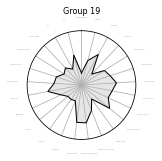

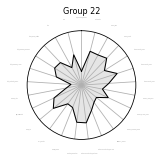

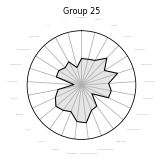

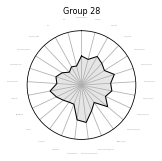

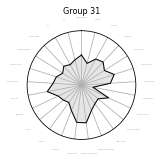

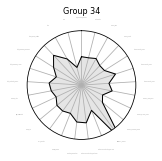

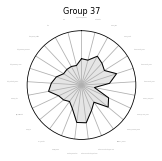

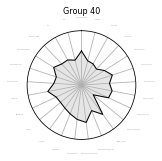

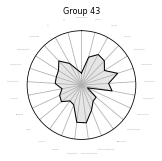

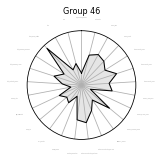

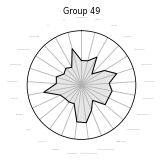

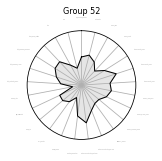

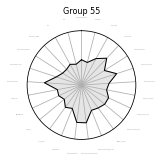

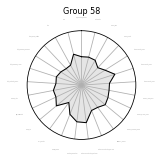

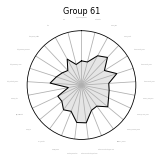

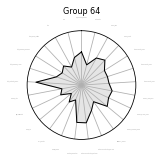

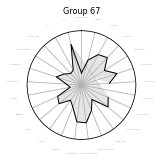

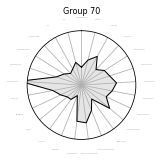

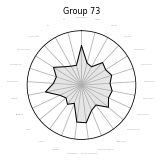

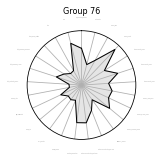

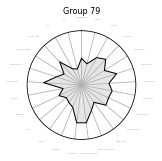

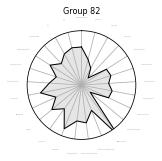

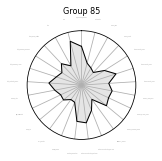

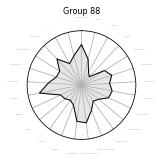

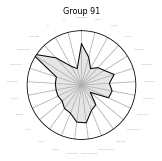

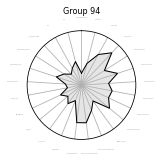

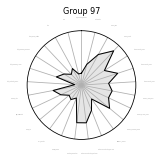

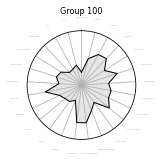

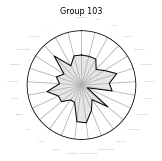

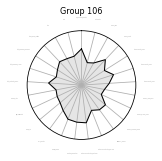

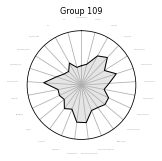

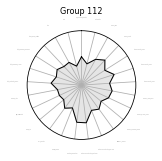

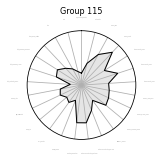

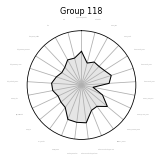

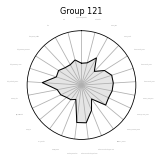

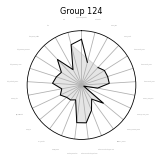

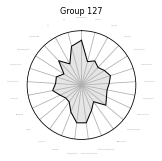

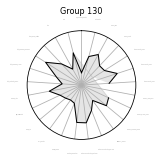

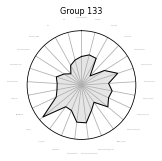

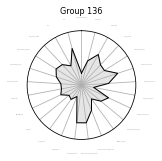

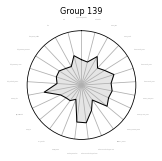

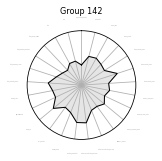

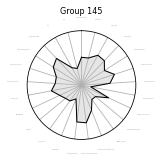

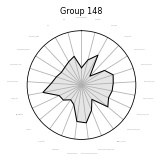

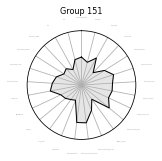

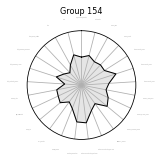

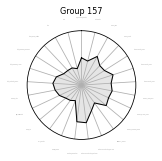

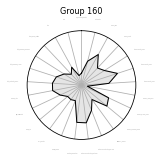

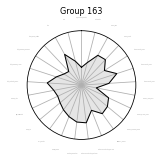

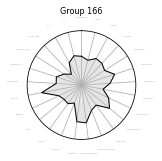

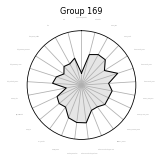

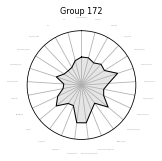

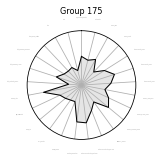

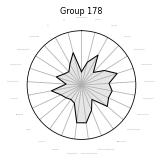

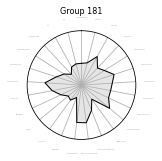

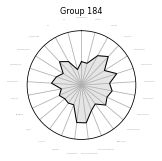

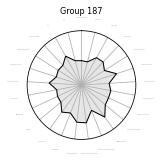

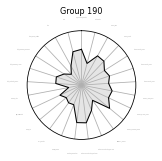

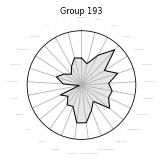

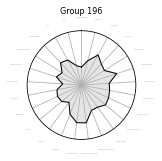

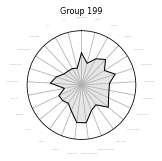

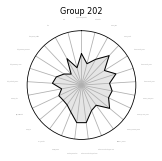

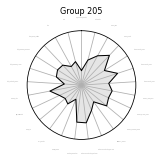

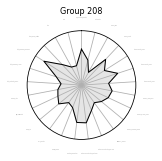

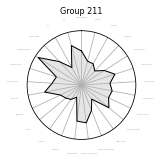

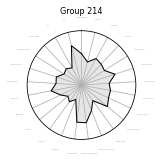

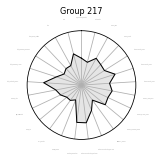

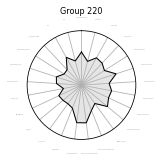

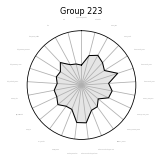

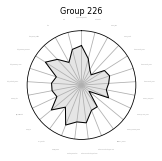

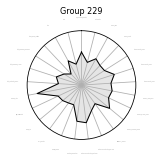

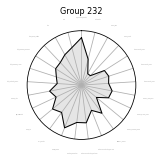

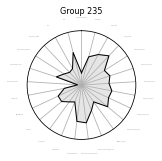

KeyError: 237

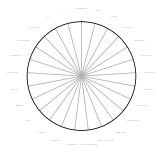

In [57]:
from math import pi 
   
def make_spider_plot(row, title, color):
    """
    Make custom polar plot for every label
    """
    # number of variable
    categories = table_km_model.columns.tolist()
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]    # first value to close the circular graph

    ########
    plt.figure(figsize = (2,2))
    ax = plt.subplot(1,1,1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size = 0)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(-2.5, 2.5)

    #######
    # We are going to plot the first line of the data frame.
    values = table_km_model.loc[row].values.flatten().tolist() 
    values += values[:1]  # first value to close the circular graph
        
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid', color = color)
    ax.fill(angles, values, color = color, alpha=0.1) # Fill area
    
    #######
    # Add a title
    plt.title(title, size = 8, color = color, y = 1.1)
    plt.show()
    

for row in range(0, table_km_model.shape[0],3):
    make_spider_plot(row = row, 
                     title = f'Group {row+1}',
                     color = 'k')